In [1]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("harishkumardatalab/food-image-classification-dataset")

print("Path to dataset files:", dataset_path)

100%|██████████| 1.68G/1.68G [00:13<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/harishkumardatalab/food-image-classification-dataset/versions/1


In [6]:
import os
import shutil

categories = ["burger", "Taco", "cheesecake", "Sandwich","pizza"]

# Make custom dataset folder
output_path = "my_food_dataset"
os.makedirs(output_path, exist_ok=True)

# Copy only selected categories
for category in categories:
    src = os.path.join(dataset_path + "/Food Classification dataset/", category)
    dst = os.path.join(output_path, category)
    if os.path.exists(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
        print(f"✅ Copied {category}")
    else:
        print(f"⚠️ Category {category} not found!")

/root/.cache/kagglehub/datasets/harishkumardatalab/food-image-classification-dataset/versions/1/Food Classification dataset/burger
my_food_dataset/burger
✅ Copied burger
/root/.cache/kagglehub/datasets/harishkumardatalab/food-image-classification-dataset/versions/1/Food Classification dataset/Taco
my_food_dataset/Taco
✅ Copied Taco
/root/.cache/kagglehub/datasets/harishkumardatalab/food-image-classification-dataset/versions/1/Food Classification dataset/cheesecake
my_food_dataset/cheesecake
✅ Copied cheesecake
/root/.cache/kagglehub/datasets/harishkumardatalab/food-image-classification-dataset/versions/1/Food Classification dataset/Sandwich
my_food_dataset/Sandwich
✅ Copied Sandwich
/root/.cache/kagglehub/datasets/harishkumardatalab/food-image-classification-dataset/versions/1/Food Classification dataset/pizza
my_food_dataset/pizza
✅ Copied pizza


In [7]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [9]:
#Count number of images for each food category
count = 0
dirs = os.listdir('my_food_dataset/')
for dir in dirs:
    files = list(os.listdir('my_food_dataset/'+dir))
    print( dir +' folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'my_food_dataset folder has '+ str(count) + ' Images')

burger folder has 331 Images
cheesecake folder has 1000 Images
Taco folder has 1500 Images
Sandwich folder has 1500 Images
pizza folder has 275 Images
my_food_dataset folder has 4606 Images


In [12]:
#Load Images into Arrays

base_dir = 'my_food_dataset/'
img_size = 180 #180x180 pixels
batch = 32

train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4606 files belonging to 5 classes.
Using 3685 files for training.
Found 4606 files belonging to 5 classes.
Using 921 files for validation.


In [18]:
train_ds.class_names

['burger', 'cheesecake', 'pizza', 'sandwich', 'taco']

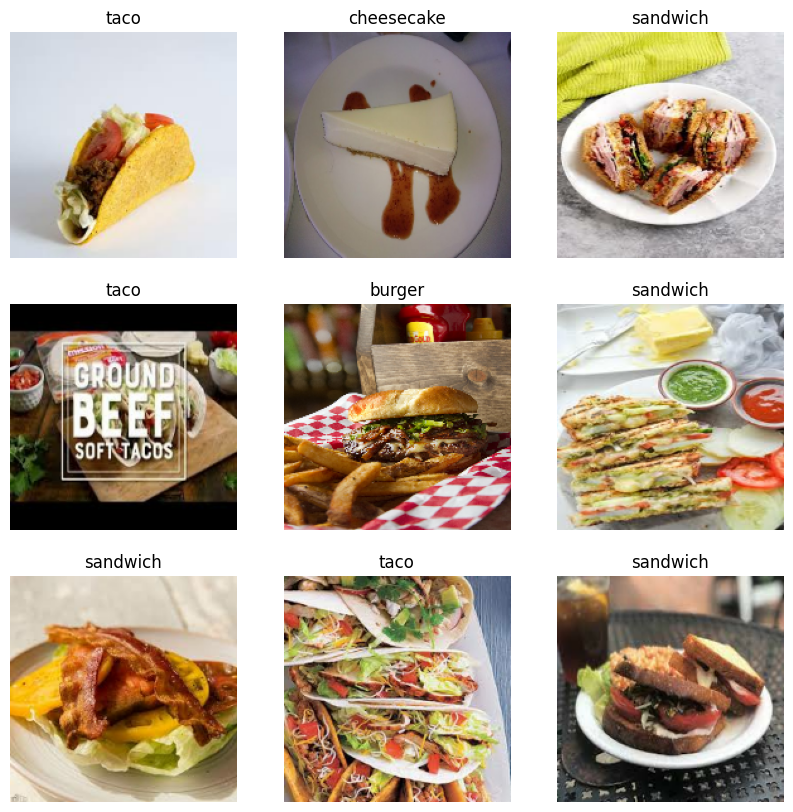

In [17]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(10,10))

#take 1 batch from the dataset
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis('off')